# Hierarchical Topographic Factor Analysis
By Jeremy R. Manning ([jeremy.r.manning@dartmouth.edu](mailto:jeremy.r.manning@dartmouth.edu)) and Paxton C. Fitzpatrick ([Paxton.C.Fitzpatrick@dartmouth.edu](mailto:Paxton.C.Fitzpatrick@dartmouth.edu))

# Overview

In this demonstration, we'll be using the [BrainIAK](https://brainiak.org/) Python toolbox to apply [Hierarchical Topographic Factor Analysis (HTFA)](https://www.sciencedirect.com/science/article/abs/pii/S1053811918300715) to an fMRI dataset.

The demo will comprise three main steps:
1. Apply HTFA to the dataset to discover a basis set of network "nodes"
2. Apply a [dynamic correlation model](https://www.biorxiv.org/content/10.1101/763821v1.full.pdf) to the HTFA fits to characterize the network dynamics
3. Visualize the network dynamics in two ways:
  - An animated [chord diagram](https://en.wikipedia.org/wiki/Chord_diagram)
  - An animated brain plot
  
# Getting started

The easiest way to run this notebook is to download the corresponding Docker image.  That will install the necessary toolboxes and dependencies, and it will also download the data you'll be analyzing.

To build the docker image, navigate to this folder and run:
```
docker build --rm --force-rm -t htfa .
```

To start the image for the first time, run:
```
docker run -it -p 8888:8888 --name htfa -v $PWD:/mnt htfa
```
and on subsequent times, run:
```
docker start htfa && docker attach htfa
```

When the docker image is started, it will automatically start a Jupyter notebook server.  Copy and paste the *third* link into a browser to interact with this notebook.

To stop running the container, run:
```
docker stop htfa
```

# Initialization

Import libraries and helper functions and load the [dataset](https://drive.google.com/open?id=1IBA39ZZjeGS1u_DvZdiw1AZZQMS3K5q0).  The dataset we'll be analyzing is a subset of the story listening dataset collected by [Simony et al. (2016)](https://www.nature.com/articles/ncomms12141).

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
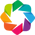

In [1]:
# the next two lines suppress a (meaningless) warning about the graphics backend
import warnings
warnings.simplefilter('ignore')

# data science and visualization libraries
import numpy as np
import pandas as pd
import nibabel as nb
import nilearn as nl
import nltools as nlt
import timecorr as tc
import seaborn as sns

from IPython.display import HTML

# system libraries
from mpi4py import MPI
import os, sys
from glob import glob as lsdir

# brainiak
from brainiak.factoranalysis.htfa import HTFA

# convenience functions from helpers.py
from helpers import nii2cmu, cmu2nii, animate_chord, animate_connectome, opts

In [2]:
debug_mode = True #set to True for a faster run (~20ish minutes); set to False for a more accurate run (overnight)

In [3]:
# data (change paths if running outside of Docker)
intact = lsdir('/data/Pieman2/sub-*/func/*intact*.nii.gz')
scrambled = lsdir('/data/Pieman2/sub-*/func/*word*.nii.gz')

if debug_mode:
    intact = intact[:3]
    scrambled = scrambled[:3]

combined_fnames = list.copy(intact)
combined_fnames.extend(scrambled)
mask = '/data/Pieman2/masks/avg152T1_gray_3mm.nii.gz'

# Fit HTFA to data

First we need to convert the dataset into [CMU format](http://www.cs.cmu.edu/afs/cs/project/theo-73/www/science2008/README-data-documentation.txt).  Consistent with CMU format, nilearn expects the data matrices to have number-of-timepoints rows and number-of-voxels columns.  BrainIAK expects the data in the transpose of that format-- number-of-voxels by number-of-timepoints matrices. We can easily convert between the two formats using the map function.

After wrangling the data, we'll fit HTFA to the full dataset to identify network nodes.

In [4]:
# convert data to CMU format
cmu_data = [nii2cmu(f) for f in combined_fnames]

In [5]:
# convert to HTFA format
htfa_data = [{'R': x['R'], 'Z': x['Y'].T} for x in cmu_data]

In [6]:
# configure MPI:
#  - if the local environment supports MPI, do computations in parallel (fast!)
#  - if MPI is not supported, do computations in serial (slower)

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

if rank == 0:
    import logging
    logging.basicConfig(stream=sys.stdout, level=logging.INFO)

In [7]:
# set up HTFA model
params = opts(debug=debug_mode)

nvoxels, ntimepoints = htfa_data[0]['Z'].shape

htfa = HTFA(K=params['K'],
            n_subj=len(htfa_data),
            max_global_iter=params['max_global_iter'], #decrease for speed, increase for greater accuracy (min: 1)
            max_local_iter=params['max_local_iter'],  #decrease for speed, increase for greater accuracy (min: 1)
            voxel_ratio=params['voxel_ratio'],   #decrease for speed, increase for greater accuracy (positive; max: 1.0)
            tr_ratio=params['tr_ratio'],      #decrease for speed, increase for greater accuracy (positive; max: 1.0)
            max_voxel=int(nvoxels*params['max_voxel_scale']), #decrease for speed, increase for greater accuracy (max: number of voxels)
            max_tr=int(ntimepoints*params['max_tr_scale']), #decrease for speed, increase for greater accuracy (max: number of TRs)
            verbose=params['verbose'])

In [8]:
# fit HTFA to htfa_data
htfa.fit([x['Z'] for x in htfa_data], [x['R'] for x in htfa_data])

INFO:brainiak.factoranalysis.htfa:Start to fit HTFA
INFO:brainiak.factoranalysis.htfa:HTFA global iter 0 
INFO:brainiak.factoranalysis.tfa:Start to fit TFA 
INFO:brainiak.factoranalysis.tfa:tfa prior posterior max diff 76.468436 mse 391.271322 diff_ratio 0.000085
INFO:brainiak.factoranalysis.tfa:tfa prior posterior max diff 116.932125 mse 883.848552 diff_ratio 0.000192
INFO:brainiak.factoranalysis.tfa:tfa prior posterior max diff 119.983517 mse 967.503085 diff_ratio 0.000209
INFO:brainiak.factoranalysis.tfa:Start to fit TFA 
INFO:brainiak.factoranalysis.tfa:tfa prior posterior max diff 54.597250 mse 212.408131 diff_ratio 0.000046
INFO:brainiak.factoranalysis.tfa:tfa prior posterior max diff 43.698122 mse 95.124787 diff_ratio 0.000021
INFO:brainiak.factoranalysis.tfa:tfa prior posterior max diff 97.801677 mse 1123.169467 diff_ratio 0.000242
INFO:brainiak.factoranalysis.tfa:Start to fit TFA 
INFO:brainiak.factoranalysis.tfa:tfa prior posterior max diff 37.738151 mse 85.060866 diff_ratio 

HTFA(K=10, max_global_iter=3, max_local_iter=3, max_tr=30, max_voxel=8834,
     n_subj=6, verbose=True, voxel_ratio=0.1)

# Plotting HTFA global and local node locations

We'll generate a plot where the global node locations are shown in black, and each subject's "local" node locations are shown in color (where each subject is assigned a different color). The nodes should be in similar (but not identical) locations across subjects.  Note: if the number of nodes or iterations is small, or if the voxel and/or timepoint subsampling is high, the final result will tend to be close to the initialized values (with little variation across subjects).  Increase `max_global_iter`, `max_local_iter`, `max_voxel`, and `max_tr` to achieve greater accuracy.

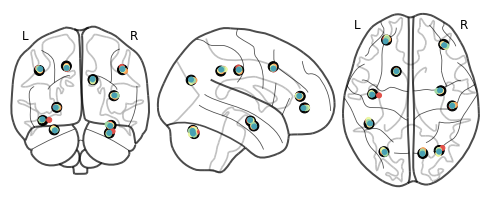

In [9]:
#set the node display properties
colors = np.repeat(np.vstack([[0, 0, 0], sns.color_palette('Spectral', htfa.n_subj)]), htfa.K, axis=0)
colors = [colors[i, :] for i in range(colors.shape[0])] #make colors into a list
sizes = np.repeat(np.hstack([np.array(100), np.array(htfa.n_subj*[25])]), htfa.K)

#extract the node locations from the fitted htfa model
global_centers = htfa.get_centers(htfa.global_posterior_)
local_centers = [htfa.get_centers(x) for x in np.array_split(htfa.local_posterior_, htfa.n_subj)]
centers = np.vstack([global_centers, np.vstack(local_centers)])

#make the plot
nl.plotting.plot_connectome(np.eye(htfa.K*(1 + htfa.n_subj)), centers, node_color=colors, node_size=sizes);

# Compute dynamic correlations

The timeseries of activations for each node, for each participant provide a low-dimensional embedding of the original data that we can use to efficiently examine dynamic connectivity patterns.  Obtaining these embeddings requires some data wrangling.

In [10]:
#The per-timepoint node weights (for all of the subjects) are stored in a single vector, htfa.local_weights_.
#(This is to enable message passing via MPI.)  We need to split up the weights by subject,
#and then reshape each subject's node weights into a K by n_timepoints matrix (which we
#take the transpose of, for convenience later on).
n_timepoints = [x['Z'].shape[1] for x in htfa_data] #number of timepoints for each person
inds = np.hstack([0, np.cumsum(np.multiply(htfa.K, n_timepoints))])
W = [htfa.local_weights_[inds[i]:inds[i+1]].reshape([htfa.K, n_timepoints[i]]).T for i in np.arange(htfa.n_subj)]

In [11]:
# filter out intact vs. (word) scrambled subjects
intact_W = [w for i, w in enumerate(W) if 'intact' in combined_fnames[i]]
scrambled_W = [w for i, w in enumerate(W) if 'word' in combined_fnames[i]]

# compute dynamic ISFC for intact, (word) scrambled
intact_disfc = tc.timecorr(intact_W, cfun=tc.isfc, combine=tc.corrmean_combine)
scrambled_disfc = tc.timecorr(scrambled_W, cfun=tc.isfc, combine=tc.corrmean_combine)

# Generate animated chord diagrams

Move the sliders to change which timepoints are displayed.

In [12]:
# intact
if debug_mode:
    max_frames = np.min([20, intact_disfc.shape[0], scrambled_disfc.shape[0]])
else:
    max_frames = np.min([intact_disfc.shape[0], scrambled_disfc.shape[0]])
    
animate_chord(intact_disfc[:max_frames, :])

:HoloMap   [Time (TRs)]
   :Chord   [source,target]   (value,sign)

In [13]:
# scrambled
animate_chord(scrambled_disfc[:max_frames, :])

:HoloMap   [Time (TRs)]
   :Chord   [source,target]   (value,sign)

# Generate animated brain network plot

Individual frames may be found in the `intact_frames` and `scrambled_frames` sub-folder of this directory.

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 432x288 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpqma0hqqs/temp.m4v


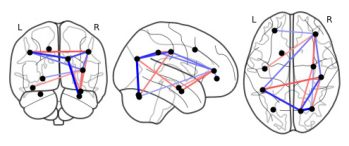

In [14]:
# intact
intact_ani = animate_connectome(global_centers, intact_disfc[:max_frames, :], figdir='intact_frames')
HTML(intact_ani.to_html5_video())

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 432x288 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpfj8o2fei/temp.m4v


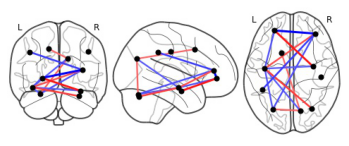

In [15]:
# scrambled
scrambled_ani = animate_connectome(global_centers, scrambled_disfc[:max_frames, :], figdir='scrambled_frames')
HTML(scrambled_ani.to_html5_video())